In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/full_clean.csv', parse_dates=['date_'])

In [7]:
df.ticker.unique()

array(['AMZN', 'GOOGL', 'GOOG', 'TSLA', 'AAPL', 'MSFT'], dtype=object)

In [5]:
df.columns

Index(['date_', 'ticker', 'open', 'high', 'low', 'close', 'vol', 'max_comp',
       'max_neg', 'max_neu', 'max_pos', 'min_comp', 'min_neg', 'min_neu',
       'min_pos', 'std_comp', 'std_neg', 'std_neu', 'std_pos', 'mean_comp',
       'mean_neg', 'mean_neu', 'mean_pos', 'median_comp', 'median_neg',
       'median_neu', 'median_pos', 'count'],
      dtype='object')

# AMZN

1. Adjust prices to a split by dividing them by 20

In [27]:
amzn = df[df['ticker'] == 'AMZN'].copy()
amzn[['open', 'high', 'low', 'close']] = amzn[['open', 'high', 'low', 'close']]/20
amzn['diffs'] = amzn.close.pct_change() * 100
# drop 1 NaN value
amzn = amzn.dropna()

<AxesSubplot:xlabel='diffs', ylabel='Count'>

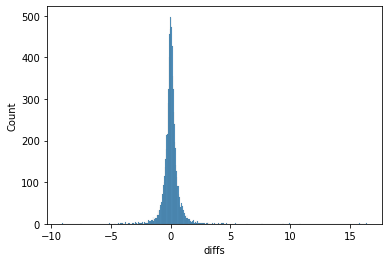

In [ ]:
sns.histplot(amzn, x='diffs')

In [ ]:
amzn.diffs.describe(percentiles=[0.025, 0.975])

count    8613.000000
mean        0.022990
std         0.697298
min        -9.063159
2.5%       -1.189902
50%         0.013113
97.5%       1.245116
max        16.392219
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.19% to 1.25%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

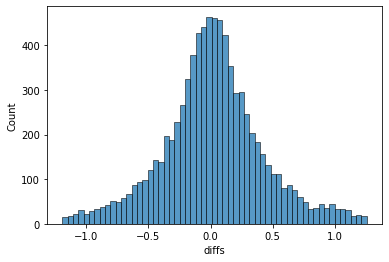

In [ ]:
diffs_no_outliers = amzn[(amzn['diffs']>-1.20) & (amzn['diffs']<1.26)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

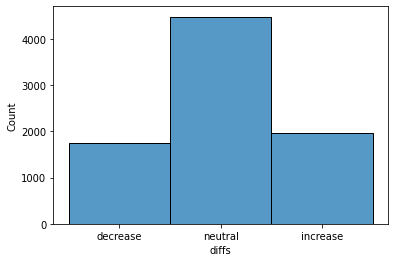

In [ ]:
# amzn distribution for 3 bins without outliers
x = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'])
sns.histplot(x)

<AxesSubplot:xlabel='diffs', ylabel='Count'>

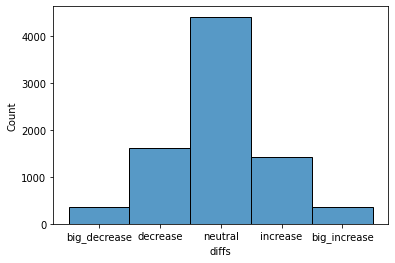

In [ ]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [ ]:
print(bins_5)

[-1.19725684 -0.70411374 -0.21342409  0.27726556  0.76795521  1.25864486]


In [ ]:
# how many outliers, what % of the data they are
diff_in_len = len(amzn)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(amzn)*100, 2))

425 4.93


In [ ]:
amzn['bin_2'] = pd.cut(amzn.diffs, bins=[-100, 0, 100], labels=[-1, 1])
amzn['bin_3'] = pd.cut(amzn.diffs, bins=[-100, -0.25, 0.25, 100], labels=[-1, 0, 1])
amzn['bin_5'] = pd.cut(amzn.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [ ]:
amzn.to_csv('../datasets/binned/amzn_binned.csv', index=False)

# Tesla

Adjust for a split by divinding by 5

In [78]:
tsla = df[df['ticker'] == 'TSLA'].copy()

In [79]:
tsla[['open', 'high', 'low', 'close']] = tsla[['open', 'high', 'low', 'close']]/5
tsla['diffs'] = tsla.close.pct_change() * 100
# drop 1 NaN value
tsla = tsla.dropna()

In [80]:
tsla.diffs.describe(percentiles=[0.025, 0.975])

count    8687.000000
mean        0.012902
std         1.044761
min       -13.684852
2.5%       -1.891711
50%         0.013187
97.5%       1.976242
max        17.482623
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.9% to 1.98%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

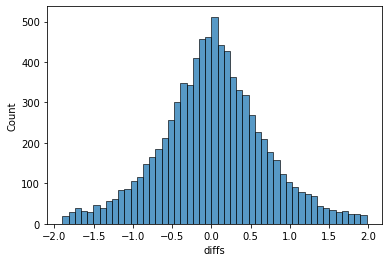

In [81]:
diffs_no_outliers = tsla[(tsla['diffs']>-1.9) & (tsla['diffs']<1.98)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

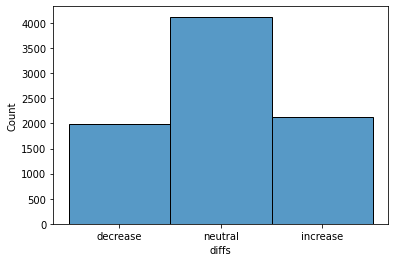

In [82]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.40, 0.40, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [83]:
x.value_counts(normalize=True)

neutral     0.500242
increase    0.258541
decrease    0.241216
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

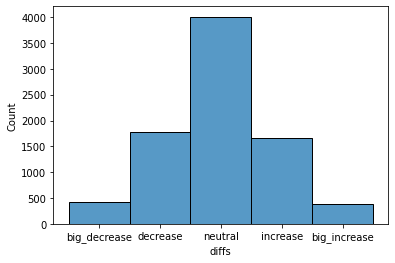

In [84]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [85]:
x.value_counts(normalize=True)

neutral         0.485462
decrease        0.216138
increase        0.202205
big_decrease    0.050521
big_increase    0.045675
Name: diffs, dtype: float64

In [86]:
print(bins_5)

[-1.90347497 -1.12431425 -0.34902995  0.42625435  1.20153865  1.97682295]


In [87]:
# how many outliers, what % of the data they are
diff_in_len = len(tsla)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(tsla)*100, 2))

433 4.98


In [88]:
tsla['bin_2'] = pd.cut(tsla.diffs, bins=[-100, 0, 100], labels=[-1, 1])
tsla['bin_3'] = pd.cut(tsla.diffs, bins=bins_3, labels=[-1, 0, 1])
tsla['bin_5'] = pd.cut(tsla.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [89]:
tsla.to_csv('../datasets/binned/tsla_binned.csv', index=False)

# Apple

Adjust for two stock splits (2 each) by diving by 4

In [95]:
aapl = df[df['ticker'] == 'AAPL'].copy()

In [107]:
aapl[['open', 'high', 'low', 'close']] = aapl[['open', 'high', 'low', 'close']]/4
aapl['diffs'] = aapl.close.pct_change() * 100
# drop 1 NaN value
aapl = aapl.dropna()

In [108]:
aapl.diffs.describe(percentiles=[0.025, 0.975])

count    8562.000000
mean        0.013259
std         0.591188
min        -8.554965
2.5%       -1.124361
50%         0.011340
97.5%       1.116002
max         7.554077
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.12% to 1.11%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

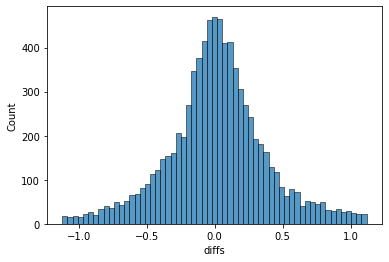

In [109]:
diffs_no_outliers = aapl[(aapl['diffs']>-1.12) & (aapl['diffs']<1.12)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

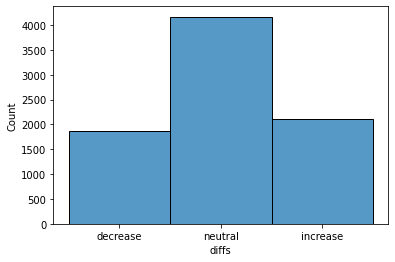

In [112]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.20, 0.20, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [113]:
x.value_counts(normalize=True)

neutral     0.512606
increase    0.258763
decrease    0.228631
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

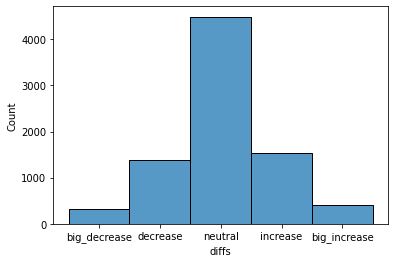

In [114]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [115]:
x.value_counts(normalize=True)

neutral         0.551470
increase        0.188292
decrease        0.169967
big_increase    0.049440
big_decrease    0.040831
Name: diffs, dtype: float64

In [116]:
print(bins_5)

[-1.1220155  -0.67262304 -0.22546637  0.2216903   0.66884697  1.11600364]


In [117]:
# how many outliers, what % of the data they are
diff_in_len = len(aapl)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(aapl)*100, 2))

431 5.03


In [118]:
aapl['bin_2'] = pd.cut(aapl.diffs, bins=[-100, 0, 100], labels=[-1, 1])
aapl['bin_3'] = pd.cut(aapl.diffs, bins=bins_3, labels=[-1, 0, 1])
aapl['bin_5'] = pd.cut(aapl.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [119]:
aapl.to_csv('../datasets/binned/aapl_binned.csv', index=False)

# Microsoft

In [127]:
msft = df[df['ticker'] == 'MSFT'].copy()

In [128]:
msft['diffs'] = msft.close.pct_change() * 100
# drop 1 NaN value
msft = msft.dropna()

In [129]:
msft.diffs.describe(percentiles=[0.025, 0.975])

count    8611.000000
mean        0.015546
std         0.561287
min        -9.670563
2.5%       -1.066537
50%         0.014783
97.5%       1.056144
max        10.993129
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.07% to 1.06%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

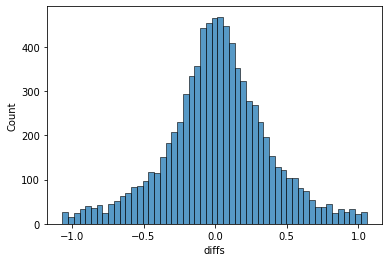

In [130]:
diffs_no_outliers = msft[(msft['diffs']>-1.07) & (msft['diffs']<1.06)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

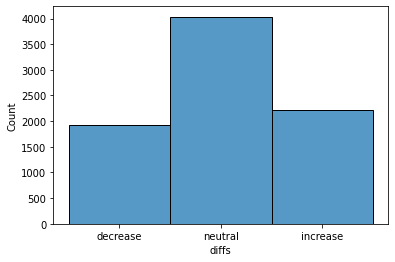

In [133]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.20, 0.20, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [134]:
x.value_counts(normalize=True)

neutral     0.493095
increase    0.271416
decrease    0.235488
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

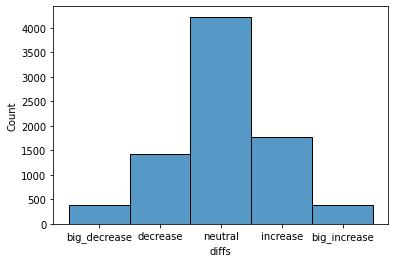

In [137]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [138]:
x.value_counts(normalize=True)

neutral         0.516314
increase        0.216180
decrease        0.174630
big_increase    0.046560
big_decrease    0.046316
Name: diffs, dtype: float64

In [139]:
# how many outliers, what % of the data they are
diff_in_len = len(msft)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(msft)*100, 2))

428 4.97


In [140]:
msft['bin_2'] = pd.cut(msft.diffs, bins=[-100, 0, 100], labels=[-1, 1])
msft['bin_3'] = pd.cut(msft.diffs, bins=bins_3, labels=[-1, 0, 1])
msft['bin_5'] = pd.cut(msft.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [141]:
msft.to_csv('../datasets/binned/msft_binned.csv', index=False)

# Goog

In [147]:
goog = df[df['ticker'] == 'GOOG'].copy()

In [149]:
goog['diffs'] = goog.close.pct_change() * 100
# drop 1 NaN value
goog = goog.dropna()

In [150]:
goog.diffs.describe(percentiles=[0.025, 0.975])

count    8780.000000
mean        0.012145
std         0.570715
min        -7.609911
2.5%       -1.039768
50%         0.009183
97.5%       1.049737
max        12.614165
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.04% to 1.05%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

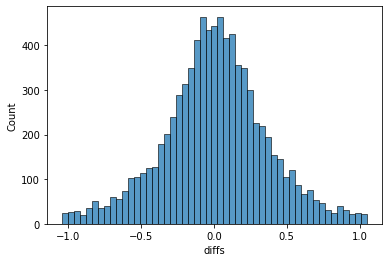

In [151]:
diffs_no_outliers = goog[(goog['diffs']>-1.04) & (goog['diffs']<1.05)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

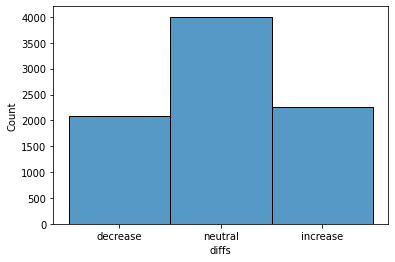

In [153]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.20, 0.20, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [154]:
x.value_counts(normalize=True)

neutral     0.480096
increase    0.270384
decrease    0.249520
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

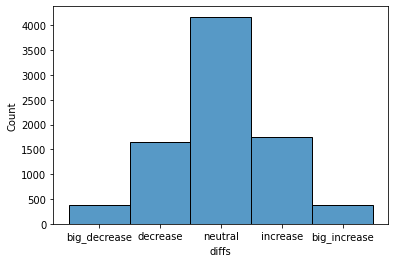

In [155]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [156]:
x.value_counts(normalize=True)

neutral         0.500360
increase        0.209592
decrease        0.198441
big_decrease    0.046283
big_increase    0.045324
Name: diffs, dtype: float64

In [157]:
print(bins_5)

[-1.0411376  -0.62145006 -0.20385051  0.21374903  0.63134858  1.04894812]


In [158]:
# how many outliers, what % of the data they are
diff_in_len = len(goog)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(goog)*100, 2))

440 5.01


In [159]:
goog['bin_2'] = pd.cut(goog.diffs, bins=[-100, 0, 100], labels=[-1, 1])
goog['bin_3'] = pd.cut(goog.diffs, bins=bins_3, labels=[-1, 0, 1])
goog['bin_5'] = pd.cut(goog.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [160]:
goog.to_csv('../datasets/binned/goog_binned.csv', index=False)

# GOOGL

In [161]:
googl = df[df['ticker'] == 'GOOGL'].copy()

In [162]:
googl[['open', 'high', 'low', 'close']] = googl[['open', 'high', 'low', 'close']]/5
googl['diffs'] = googl.close.pct_change() * 100
# drop 1 NaN value
googl = googl.dropna()

In [163]:
googl.diffs.describe(percentiles=[0.025, 0.975])

count    8778.000000
mean        0.012113
std         0.577882
min        -7.501543
2.5%       -1.059171
50%         0.008335
97.5%       1.090677
max        13.801642
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.06% to 1.09%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

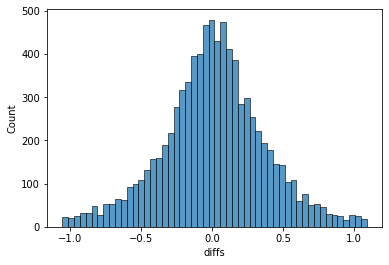

In [164]:
diffs_no_outliers = googl[(googl['diffs']>-1.06) & (googl['diffs']<1.09)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

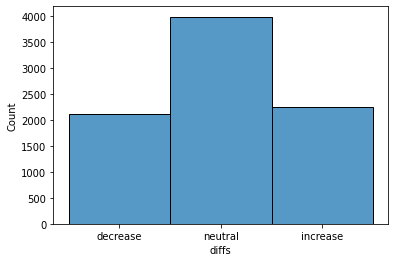

In [166]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.20, 0.20, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [167]:
x.value_counts(normalize=True)

neutral     0.477390
increase    0.269282
decrease    0.253329
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

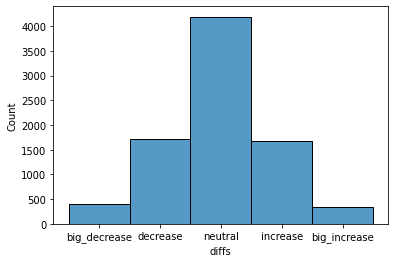

In [168]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [169]:
x.value_counts(normalize=True)

neutral         0.502579
decrease        0.205949
increase        0.202351
big_decrease    0.048339
big_increase    0.040782
Name: diffs, dtype: float64

In [171]:
# how many outliers, what % of the data they are
diff_in_len = len(googl)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(googl)*100, 2))

441 5.02


In [172]:
googl['bin_2'] = pd.cut(googl.diffs, bins=[-100, 0, 100], labels=[-1, 1])
googl['bin_3'] = pd.cut(googl.diffs, bins=bins_3, labels=[-1, 0, 1])
googl['bin_5'] = pd.cut(googl.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [173]:
googl.to_csv('../datasets/binned/googl_binned.csv', index=False)